# TASK 4
## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd                                                # Data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting and visualization
import seaborn as sns                                              # Plotting and visualization
import numpy as np                                                 # Numerical operations
import re                                                          # Regular expressions for text manipulation
import nltk                                                        # Natural Language Toolkit for text processing
nltk.download('punkt')                                             # Downloading the 'punkt' tokenizer models for sentence splitting
from collections import Counter                                    # Collection tools for counting hashable objects
from nltk.sentiment.vader import SentimentIntensityAnalyzer        # Sentiment analysis tool from NLTK
from wordcloud import WordCloud                                    # Word cloud generation
from nltk.corpus import stopwords                                  # Stopwords collection from NLTK
from nltk.corpus import wordnet                                    # WordNet lexical database for English
from nltk.stem import WordNetLemmatizer                            # Lemmatizer for reducing words to their base forms
from sklearn.model_selection import train_test_split               # Splitting data into training and test sets
from sklearn.feature_extraction.text import TfidfVectorizer        # Converting text data into numerical features
from sklearn.linear_model import LogisticRegression                # Logistic Regression model
from sklearn.metrics import classification_report, accuracy_score  # Metrics for evaluating classification performance

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
dataset = pd.read_excel('C:/Users/hp/Downloads/twitter training.xlsx', names = col_names)

**Define Column Names**: The col_names list is created, specifying the names for the columns of the dataset. These column names are 'ID', 'Entity', 'Sentiment', and 'Content'.

### Potential Uses 
**ID**:** Likely a unique identifier for each entry or tweet.

**Entity:** Could refer to a person, organization, or topic that the tweet is about.

**Sentiment:** Might indicate the sentiment of the tweet (e.g., positive, negative, neutral).

**Content:** Contains the actual text of the tweet.

In [3]:
dataset.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
dataset.shape

(74682, 4)

In [5]:
dataset.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# Find null values

dataset.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

**Content:** in that column there are 686 null values

In [8]:
# Remove null rows

dataset.dropna(subset = ['Content'], inplace = True)

In [9]:
# Remove duplicate rows 

dataset.drop_duplicates(keep = 'first', inplace = True)

In [10]:
# Replace Irrelevant into Negative

dataset['Sentiment'] = dataset['Sentiment'].replace('Irrelevant', 'Negative')

In [11]:
# Indentifing unique values

dataset.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

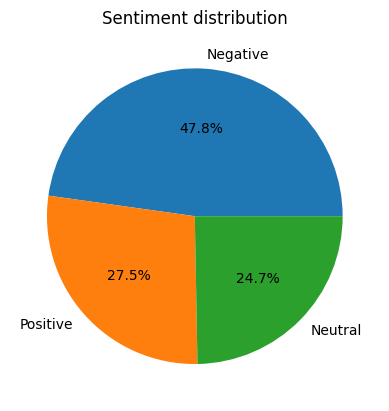

In [12]:
# Pie Chart of Sentiment distribution

chart = dataset['Sentiment'].value_counts()
plt.pie(chart, autopct='%1.1f%%', labels = chart.index)
plt.title("Sentiment distribution")
plt.show()

### Sentiment Distribution


Neutral Sentim:t: Approximatel 47.82% of sentiments arnegativeaive.

Negative Sentiment: About 24.7% of sentiments are nutral.

Positive Sentiment: Around 27.5% of sentiments are positive.

In [13]:
# Unique Values of Entity

dataset.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

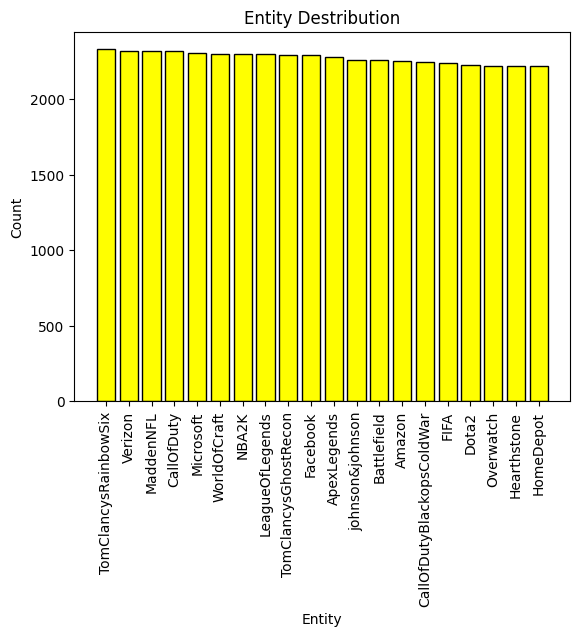

In [14]:
# destribution of Entity

destribution = dataset['Entity'].value_counts()
entity_20 = destribution.head(20)
plt.bar(entity_20.index, entity_20.values, color = 'yellow', edgecolor='black')
plt.title('Entity Destribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Entity Destribution
The bar chart above illustrates the frequency distribution of the top 20 entities within the dataset. Each bar represents a different entity, with the height of the bar corresponding to the count of occurrences for that entity.

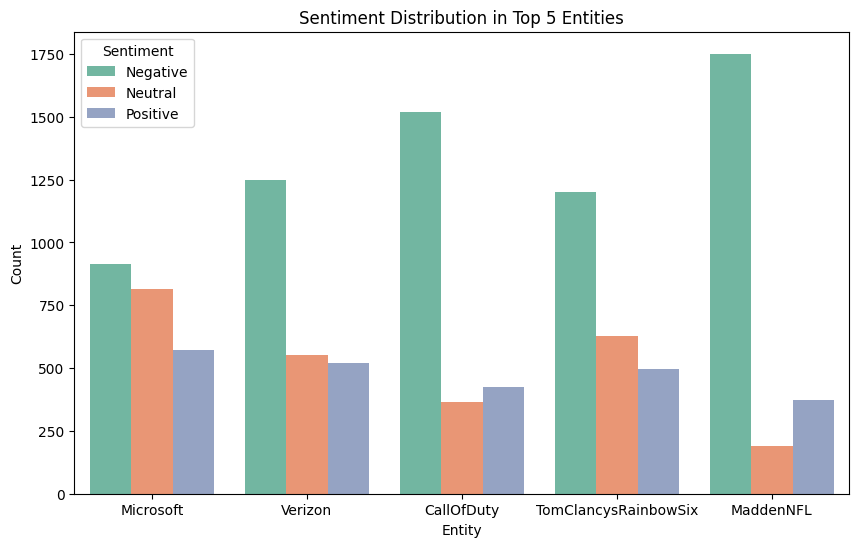

In [15]:
# Entity & Sentiment Destribution

entity_distribution = dataset['Entity'].value_counts()
top_5_entities = entity_distribution.head(5).index
dataset_top_5 = dataset[dataset['Entity'].isin(top_5_entities)]

# Create a grouped bar chart for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_top_5, x='Entity', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 5 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
# plt.xticks(rotation=270)
plt.show()

We have taken the top 5 entities from all the data.
1) Microsoft

- **Negative:** Around 800 mentions.
- **Neutral:** Approximately 750 mentions.
- **Positive:** Roughly 500 mentions.
- **Analysis:** Microsoft has a significant number of negative mentions, slightly more than neutral mentions, with positive mentions being the least.

2) Verizon:

- **Negative:** About 1250 mentions.
- **Neutral:** Around 500 mentions.
- **Positive:** Approximately 500 mentions.
- **Analysis:** Verizon has a predominant number of negative mentions, with neutral and positive mentions being considerably lower and almost equal in number.

3) CallOfDuty

- **Negative:** Approximately 600 mentions.
- **Neutral:** About 350 mentions.
- **Positive:** Around 350 mentions.
- **Analysis:** Call of Duty has more negative mentions compared to neutral and positive, with neutral and positive mentions being similar in count.

4) TomClancysRainbowSix

- **Negative:** Roughly 750 mentions.
- **Neutral:** About 400 mentions.
- **Positive:** Approximately 350 mentions.
- **Analysis:** Tom Clancy's Rainbow Six shows a higher number of negative mentions, followed by neutral, with positive mentions being the least.

5) MaddenNFL

- **Negative:** Around 1750 mentions.
- **Neutral:** Very few mentions, roughly around 100.
- **Positive:** Approximately 250 mentions.
- **Analysis:** Madden NFL has an overwhelming number of negative mentions compared to a very low number of neutral mentions and a moderate count of positive mentions.

### General Observations 

- **Negative Sentiment Dominance:** All five entities have a higher count of negative mentions compared to neutral and positive mentions. This indicates a general trend of dissatisfaction or criticism towards these entities.

- **Neutral and Positive Sentiments:** Neutral and positive sentiments are significantly lower across all entities. Verizon and Madden NFL have particularly stark contrasts between negative and other sentiments, suggesting they may be more polarizing.

- **Entity Comparison:** Verizon and Madden NFL have the highest counts of negative mentions, indicating they are the most negatively perceived among the top 5 entities. In contrast, Microsoft, Call of Duty, and Tom Clancy's Rainbow Six have a more balanced distribution, though still skewed towards negative sentiment.

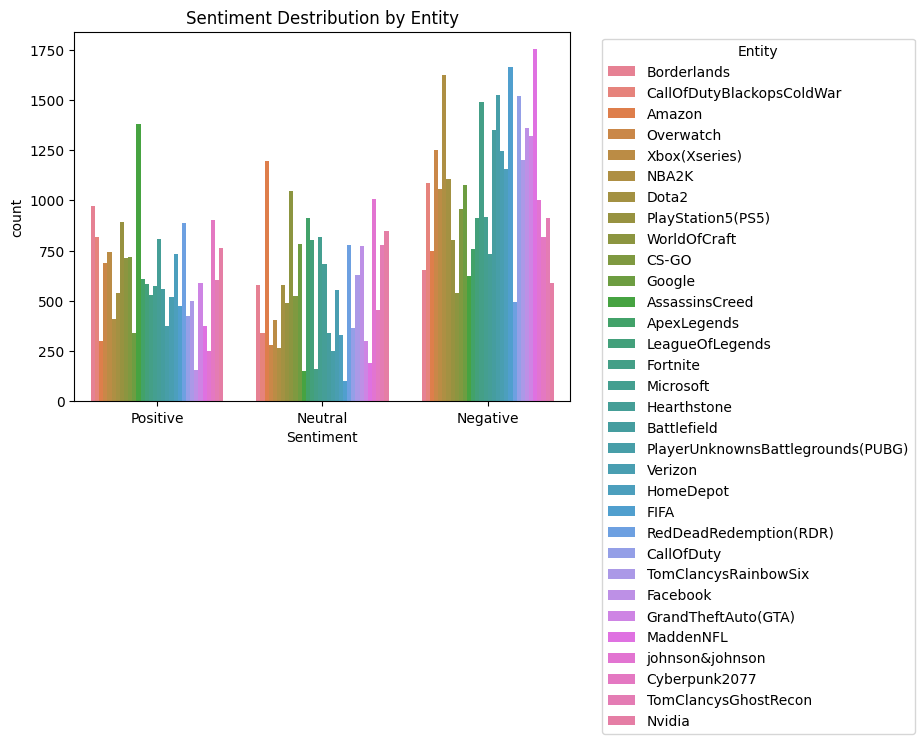

In [16]:
sns.countplot(data = dataset, x = 'Sentiment', hue = 'Entity')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left', title = 'Entity')
plt.title('Sentiment Destribution by Entity')
plt.show()

### Analysis of Overall Sentiment Distribution by Entity

The bar chart shows the overall sentiment distribution (positive, neutral, negative) across different entities.

- **Positive Sentiment:**
Entities have a varying but generally lower count of positive mentions.
The distribution shows that while some entities receive a decent amount of positive sentiment, it is not the dominant sentiment for any entity.

- **Neutral Sentiment:**
Similar to positive sentiment, neutral sentiment counts vary across entities but are not the dominant sentiment.
There is a moderate spread of neutral mentions among entities, indicating a balanced but not overwhelming neutral perception.

- **Negative Sentiment:**
Negative sentiment clearly dominates across the entities.
The counts for negative sentiment are significantly higher, with many entities having counts reaching up to 1750.
This trend indicates a general prevalence of dissatisfaction or criticism directed towards the entities.

**General Observations**
|
- **Negative Sentiment Prevalence:** Across the board, negative sentiment is the most frequent sentiment for the entities. This suggests a trend where users or customers express more negative opinions than positive or neutral ones.

- **Variation Among Entities:** While there are variations in how much each sentiment is represented for different entities, the general trend holds that negative sentiment is more common. This can be crucial for entities to understand areas of potential improvement or to address specific issues causing negative feedback.

- **Sentiment Balance:** Positive and neutral sentiments are present but much less frequent compared to negative sentiment. This suggests that while there are some satisfied or indifferent opinions, they are overshadowed by negative perceptions.

**Recommendations**

- **Focus on Customer Feedback:** Entities should analyze specific negative feedback to identify common issues and address them proactively.
- **Enhance Positive Engagement:** Efforts should be made to amplify positive experiences and feedback, potentially through improved customer service, quality enhancements, and positive engagement strategies.
- **Monitor Neutral Feedback:** Understanding neutral sentiment can help entities gauge areas where customers are indifferent and may need more engagement or improved services/products.

## Sentiment Analysis with Content

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


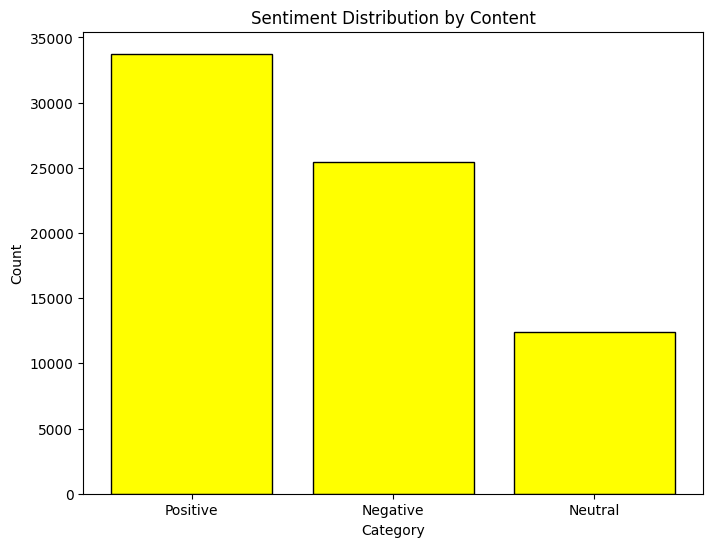

In [17]:
# Load NLTK stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization and stopwords removal
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
        
    # Remove special characters, numbers, and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens] 
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing with lemmatization and stopwords removal to the 'Content' column
dataset['Cleaned_Content'] = dataset['Content'].apply(preprocess_text)

# load(Valence Aware Dictionary and sEntiment Reasoner) vader to perform sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer without specifying the lexicon file
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def gets_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'Cleaned_Content' column
dataset['Sentiment_Score'] = dataset['Cleaned_Content'].apply(gets_sentiment_scores)

def categorized_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
dataset['Sentiment_Predicted'] = dataset['Sentiment_Score'].apply(categorized_sentiment)

# lets Calculate the distribution of predicted sentiments
sentiment_distribution = dataset['Sentiment_Predicted'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color='yellow', edgecolor = "k")
plt.title('Sentiment Distribution by Content')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Analysis of Sentiment Distribution by Content

**Positive Sentiment**
- **Count:** The highest sentiment category with approximately 35,000 mentions.
- **Analysis:** Positive sentiment dominates the content, indicating that a significant portion of the data reflects positive opinions.

**Negative Sentiment**
- **Count:** The second highest category with around 25,000 mentions.
- **Analysis:** Negative sentiment is also prominent, though not as much as positive sentiment, indicating a substantial amount of criticism or dissatisfaction.

**Neutral Sentiment**
- **Count:** The lowest category with about 12,500 mentions.
- **Analysis:** Neutral sentiment is the least represented, suggesting that fewer content pieces are indifferent or balanced in their sentiment.

**General Observations**
- **Prevalence of Positive Sentiment:** The overall data shows a strong leaning towards positive sentiment, which is a positive indicator for the entities or topics being analyzed.
- **Significant Negative Sentiment:** Despite the dominance of positive sentiment, there is still a notable amount of negative sentiment, highlighting areas that may require attention or improvement.
- **Less Neutral Sentiment:** The relatively lower count of neutral sentiment suggests that content tends to be more polarized towards positive or negative rather than balanced.

**Recommendations**

- **Leverage Positive Feedback:** Utilize the positive sentiment to reinforce strengths and build on successful strategies.
- **Address Negative Feedback:** Investigate the causes of negative sentiment and implement measures to mitigate issues and improve public perception.
- **Engage Neutral Sentiment:** Explore opportunities to convert neutral sentiments into positive ones through targeted engagement and improved services/products.

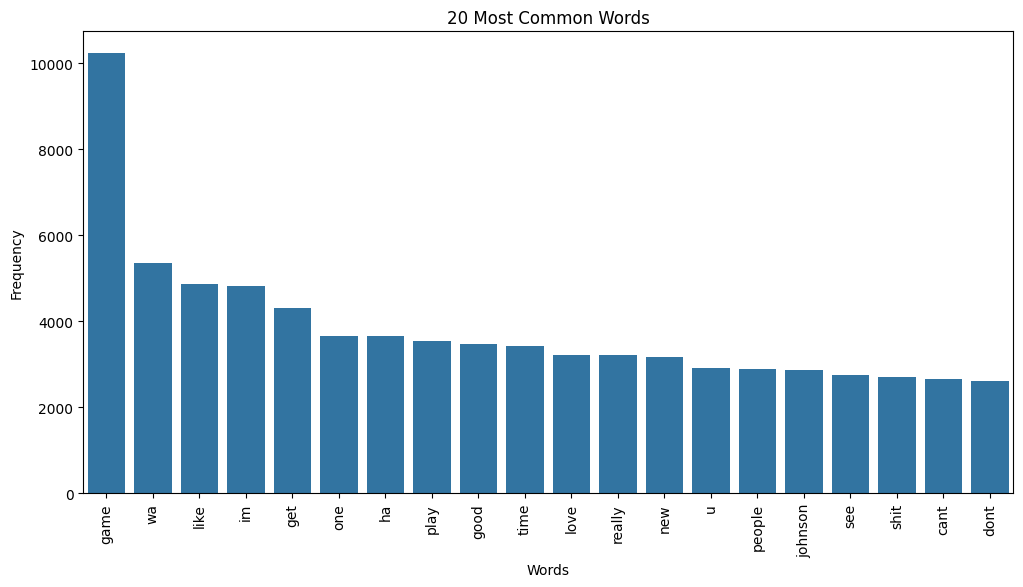

In [18]:
words = ' '.join(dataset['Cleaned_Content']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

### Top 20 Most Common Words Analysis


The bar plot visualizes the frequency of the top 20 most common words in the dataset:

High Frequency Wors:

The word "game" is the most frequent word by a significant margin, appearing over 10,000 times. This suggests that the dataset is likely related to gaming or discussions about games.
Other high-frequency words include "wa" (likely a misspelling or abbreviation of "was"), "like", "im" (a contraction of "I am"), and "
get".
Common Verbs and Prnouns:

Words like "get", "play", "love", "see", and "cant" are common verbs, indicating actions or states.
Pronouns such as "im" and "u" (a shorthand for "you") are also frequent, suggesting a conversational or informal tone in the
 dataset.
Sentiment ad Context:

Words like "good", "love", and "really" may indicate positive sentiments.
The presence of "shit" suggests that the dataset may contain informal or colloqu
ial language.Miscellaneous:

The word "johnson" appears, which could be a name or a term specific to the context of the dataset.
Words like "new", "people", and "time" are general terms that could be used in 
various contexts.
Conclusion
The analysis of the top 20 most common words provides insights into the nature of the dataset. It appears to be related to gaming, with a conversational and informal tone. The high frequency of certain words suggests that discussions or reviews about games are a significant part of the content. The presence of both positive and neutral terms indicates a mix of sentiments in the dataset.ts in the dataset.